## Markowitz analysis not used in practice
* Commonly yields 'unreasonable corner solutions' becuase of the presence of parameter estimates ~not robust
* The global minimum variance portfolio is often used in place because of the lower reliance on estimates

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from my_modules import risk
from my_modules import data
from my_modules import portfolio

from scipy.optimize import minimize
import numpy as np
import pandas as pd

ind = data.get_ind30_vw_returns()
er = risk.annualise_rets(ind['1996':'2000'])
cov = ind['1996':'2000'].cov()

In [3]:
l = ['Food', 'Steel']
portfolio.msrp(0.1, er[l], cov.loc[l,l])

array([0.75040363, 0.24959637])

In [4]:
# 75:25 split
# Depends on knowing the expected returns, which are hard to estimate
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [6]:
# replacing the actual returns with a reasonable guess
portfolio.msrp(0.1, np.array([0.11,0.12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

In [7]:
# a worse guess returns an even more dramatic difference in the W
portfolio.msrp(0.1, np.array([0.10,0.13]), cov.loc[l,l])

array([0., 1.])

In [8]:
portfolio.msrp(0.1, np.array([0.13,0.10]), cov.loc[l,l])

array([1., 0.])

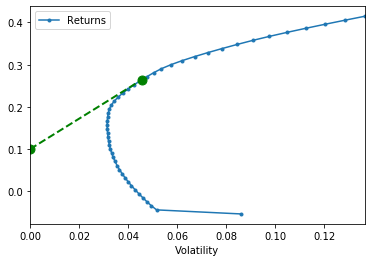

In [9]:
portfolio.plot_n_asset_frontier(20, er, cov, show_cml=True, riskfree_rate=0.1)

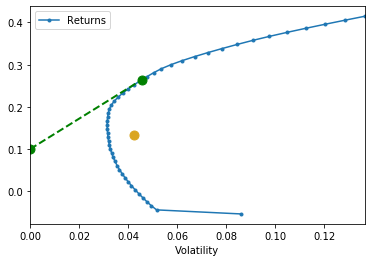

In [13]:
# On the efficient frontier, there is one portfolio which doesn't need er. The GMV is the 'nose' of the 
# efficient portfolio. Another approach is just doing the equal weight of all assets
portfolio.plot_n_asset_frontier(20, er, cov, show_cml=True, show_ew=True, riskfree_rate=0.1)

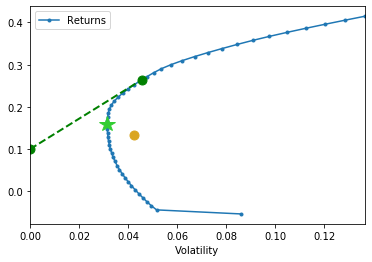

In [18]:
portfolio.plot_n_asset_frontier(20, er, cov, show_cml=True, show_ew=True, show_gmv=True, riskfree_rate=0.1)